In [2]:
!unzip bloodcancer.zip

Archive:  bloodcancer.zip
replace Original/Benign/WBC-Benign-001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.regularizers import l2

In [4]:
dataset_dir = '/content/Original'
class_names =  ['Benign', 'Early', 'Pre', 'Pro']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)
dataset_dir = '/content/Segmented'
class_names = ['Benign', 'Early', 'Pre', 'Pro']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)
images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)

In [5]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
numerical_labels = np.array([label_mapping[label] for label in labels])
categorical_labels = to_categorical(numerical_labels)
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)


In [6]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)




In [7]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step - accuracy: 0.4979 - loss: 109.5085 - val_accuracy: 0.6794 - val_loss: 0.7941
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.7335 - loss: 0.7497 - val_accuracy: 0.7331 - val_loss: 0.8087
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 287s 4s/step - accuracy: 0.8502 - loss: 0.5563 - val_accuracy: 0.8129 - val_loss: 0.6461
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 0.9458 - loss: 0.1949 - val_accuracy: 0.7699 - val_loss: 0.7426
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 295s 4s/step - accuracy: 0.9460 - loss: 0.2118 - val_accuracy: 0.8528 - val_loss: 0.5425
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.9906 - loss: 0.0460 - val_accuracy: 0.8466 - val_loss: 0.6779
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.9951 - loss: 0.0291 - val_accuracy: 0.8497 - val_loss: 0.6426
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.7929 -

In [8]:


model.save('maheshbabu.h5')

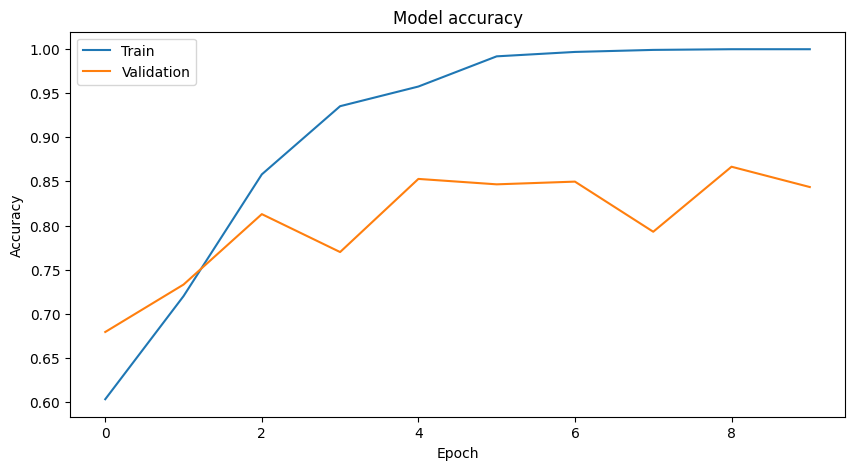

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# prompt: give all the metrics like accuracy,precision,recall,f1-score in percentage

from sklearn.metrics import classification_report

# Assuming y_pred contains your model's predictions for X_test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

# Extract metrics and print them as percentages
for class_name in class_names:
    print(f"Metrics for class {class_name}:")
    print(f"  Precision: {report[class_name]['precision'] * 100:.2f}%")
    print(f"  Recall: {report[class_name]['recall'] * 100:.2f}%")
    print(f"  F1-score: {report[class_name]['f1-score'] * 100:.2f}%")

print(f"\nOverall Metrics:")
print(f"Accuracy: {report['accuracy'] * 100:.2f}%")
print(f"Macro Avg Precision: {report['macro avg']['precision'] * 100:.2f}%")
print(f"Macro Avg Recall: {report['macro avg']['recall'] * 100:.2f}%")
print(f"Macro Avg F1-score: {report['macro avg']['f1-score'] * 100:.2f}%")
print(f"Weighted Avg Precision: {report['weighted avg']['precision'] * 100:.2f}%")
print(f"Weighted Avg Recall: {report['weighted avg']['recall'] * 100:.2f}%")
print(f"Weighted Avg F1-score: {report['weighted avg']['f1-score'] * 100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step
Metrics for class Benign:
  Precision: 77.12%
  Recall: 73.39%
  F1-score: 75.21%
Metrics for class Early:
  Precision: 86.21%
  Recall: 76.53%
  F1-score: 81.08%
Metrics for class Pre:
  Precision: 78.74%
  Recall: 89.56%
  F1-score: 83.80%
Metrics for class Pro:
  Precision: 95.42%
  Recall: 97.33%
  F1-score: 96.37%

Overall Metrics:
Accuracy: 84.36%
Macro Avg Precision: 84.37%
Macro Avg Recall: 84.20%
Macro Avg F1-score: 84.12%
Weighted Avg Precision: 84.52%
Weighted Avg Recall: 84.36%
Weighted Avg F1-score: 84.24%


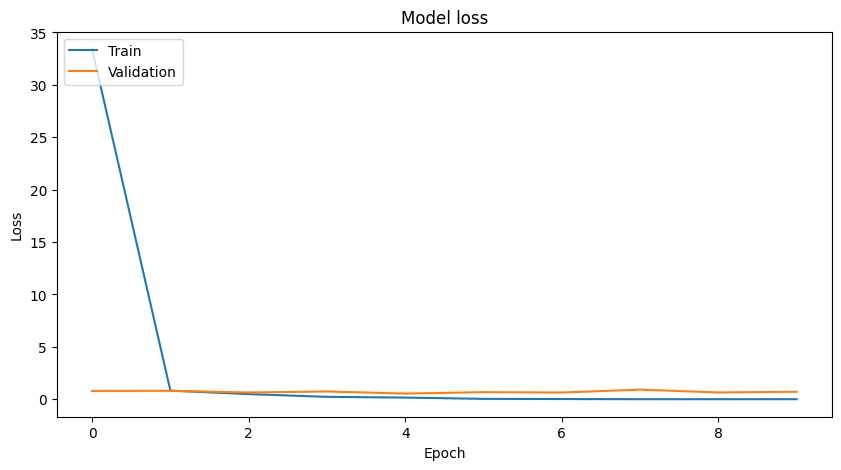

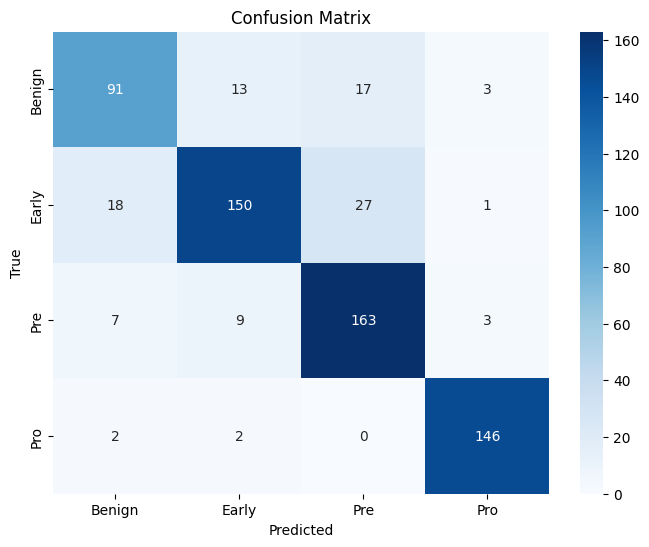

In [11]:
# prompt: plot the graphs based on the metrics

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 916ms/step
Accuracy: 0.843558282208589
Precision: 0.8451593565172448
Recall: 0.843558282208589
F1-score: 0.8424141016954008


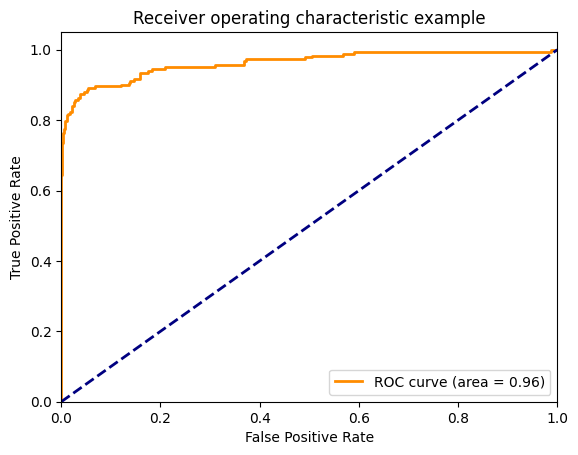

In [12]:
# prompt: Once the model is finalized, evaluate its performance on the test set using metrics like accuracy, precision, recall, F1-score, and AUC-ROC curve.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import label_binarize

# Assuming 'model' and 'X_test', 'y_test' are defined from previous code
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(y_test, axis = 1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted') # Use weighted for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


# Binarize the output for ROC AUC
y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
n_classes = y_true_binarized.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], y_pred_probabilities[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred_probabilities.ravel())
roc_auc["micro"] = roc_auc_score(y_true_binarized, y_pred_probabilities, average="micro")

#Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Convert one-hot encoded labels back to class indices
y_train_svm = np.argmax(y_train, axis=1)
y_test_svm = np.argmax(y_test, axis=1)

# Reshape image data into 2D (flattened features)
X_train_svm = X_train.reshape(X_train.shape[0], -1)
X_test_svm = X_test.reshape(X_test.shape[0], -1)

# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', C=1)  # You can experiment with 'rbf' or 'poly' kernels

# Train the SVM model
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Generate a classification report
report_svm = classification_report(y_test_svm, y_pred_svm, target_names=class_names)
print(report_svm)


SVM Accuracy: 0.6196
              precision    recall  f1-score   support

      Benign       0.43      0.36      0.39       124
       Early       0.55      0.55      0.55       196
         Pre       0.56      0.58      0.57       182
         Pro       0.89      0.97      0.93       150

    accuracy                           0.62       652
   macro avg       0.61      0.62      0.61       652
weighted avg       0.61      0.62      0.61       652



In [14]:
# prompt: use random forest

import numpy as np
# Assuming X_train, X_test, y_train, y_test are defined from your previous code.

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
rf_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# You can also generate a classification report for Random Forest
report_rf = classification_report(np.argmax(y_test, axis=1), y_pred_rf, target_names=class_names)
report_rf

# You can explore different hyperparameters for Random Forest using GridSearchCV


Random Forest Accuracy: 0.75920245398773


'              precision    recall  f1-score   support\n\n      Benign       0.84      0.13      0.22       124\n       Early       0.69      0.85      0.76       196\n         Pre       0.82      0.92      0.87       182\n         Pro       0.78      0.97      0.86       150\n\n    accuracy                           0.76       652\n   macro avg       0.78      0.72      0.68       652\nweighted avg       0.77      0.76      0.71       652\n'

In [15]:
# prompt: use K-NN

import numpy as np
# Assuming X_train, X_test, y_train, y_test are defined from your previous code.

# Create a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluate the KNN model
accuracy_knn = accuracy_score(np.argmax(y_test, axis=1), y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# You can also generate a classification report for KNN
report_knn = classification_report(np.argmax(y_test, axis=1), y_pred_knn, target_names=class_names)
report_knn

# You can explore different values of 'n_neighbors' and other hyperparameters using GridSearchCV


KNN Accuracy: 0.30368098159509205


'              precision    recall  f1-score   support\n\n      Benign       0.03      0.01      0.01       124\n       Early       0.09      0.02      0.03       196\n         Pre       0.45      0.24      0.31       182\n         Pro       0.30      1.00      0.47       150\n\n    accuracy                           0.30       652\n   macro avg       0.22      0.32      0.21       652\nweighted avg       0.23      0.30      0.21       652\n'

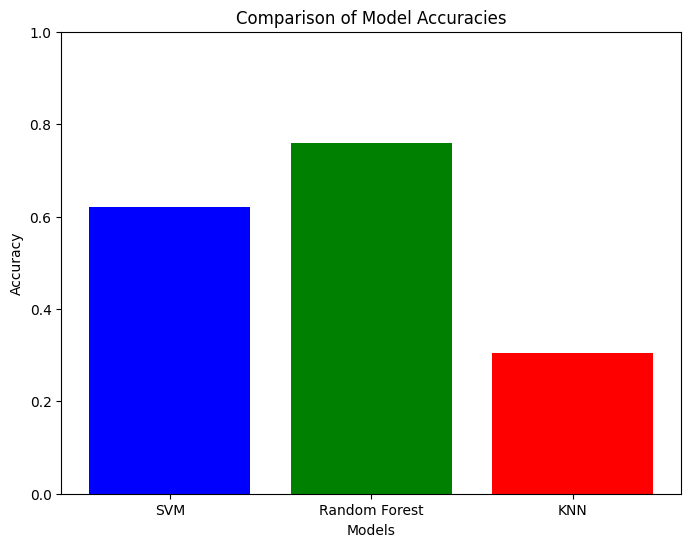

In [16]:
# prompt: plot the graph for svm,rf,knn

import matplotlib.pyplot as plt

# Assuming you have accuracy values for SVM, RF, and KNN stored in variables
# accuracy_svm, accuracy_rf, accuracy_knn

models = ['SVM', 'Random Forest', 'KNN']
accuracies = [accuracy_svm, accuracy_rf, accuracy_knn]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy
plt.show()
